## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE UNIMI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://datascience.unimi.it"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Data Science Research Center (DSRC) – Università degli Studi di Milano


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url2= lista_url[3:8]
lista_url2

['https://datascience.unimi.it/',
 'https://datascience.unimi.it/?page_id=101',
 'https://datascience.unimi.it/?page_id=87',
 'https://datascience.unimi.it/?page_id=136',
 'https://datascience.unimi.it/?page_id=90']

In [4]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Data Science Research Center (DSRC) – Università degli Studi di Milano',
 'Blog – Data Science Research Center (DSRC)',
 'Scientific Committee and members – Data Science Research Center (DSRC)',
 'Skills & Expertise – Data Science Research Center (DSRC)',
 'Contacts – Data Science Research Center (DSRC)']

In [5]:
texts[0]

'\n\n\n\n\n\n\nDSRC\n\n\n\nThe Data Science Research Center is a Coordinate Research Center of Università degli Studi di Milano, whose members come from 7 departments.\nThe primary aim of the \u200bData Science Research Center (DSRC) is to integrate the expertise and the research activities in computer science, statistics and mathematics of Università degli Studi di Milano (UNIMI) towards a modern and innovative approach to intelligent processes, based on the analysis of heterogeneous and big data. \nSpecifically, the aim of the DSRC is to foster the centrality of Data Science as a common and unifying approach to cultural, scientific and social challenges of the upcoming years, by the involvement of the wide disciplinary variety of UNIMI, ranging from Social Sciences to Humanities, from Life and Environmental Sciences to Medicine, paying particular attention to the thematics of data security, protection and ethical management. \n\n\nDipartimento di Informatica “Giovanni Degli Antoni”\n

In [6]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [7]:
texts2[0]

'       DSRC    The Data Science Research Center is a Coordinate Research Center of Università degli Studi di Milano, whose members come from 7 departments. The primary aim of the \u200bData Science Research Center (DSRC) is to integrate the expertise and the research activities in computer science, statistics and mathematics of Università degli Studi di Milano (UNIMI) towards a modern and innovative approach to intelligent processes, based on the analysis of heterogeneous and big data.  Specifically, the aim of the DSRC is to foster the centrality of Data Science as a common and unifying approach to cultural, scientific and social challenges of the upcoming years, by the involvement of the wide disciplinary variety of UNIMI, ranging from Social Sciences to Humanities, from Life and Environmental Sciences to Medicine, paying particular attention to the thematics of data security, protection and ethical management.    Dipartimento di Informatica “Giovanni Degli Antoni”   Dipartimento di

In [8]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [9]:
texts3[0]

'The Data Science Research Center is a Research Center of di , whose come from 7 . The primary aim of the \u200b Data Science Research Center ( ) is to integrate the and the research in computer science , statistics and mathematics of di ( ) towards a modern and innovative approach to intelligent , based on the analysis of heterogeneous and big data . Specifically , the aim of the is to foster the centrality of Data Science as a common and approach to cultural , scientific and social of the upcoming , by the involvement of the wide disciplinary variety of , ranging from Social to , from Life and Environmental to Medicine , paying particular attention to the of data security , protection and ethical management . di “ ” di , Management e di e di e di e di di e “ L . ” di e'

### TEXT CLEANING

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

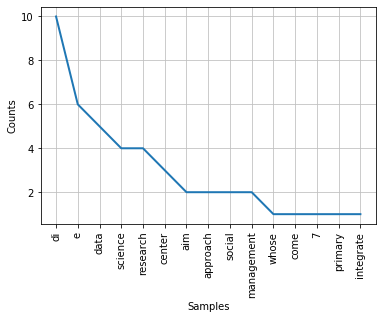

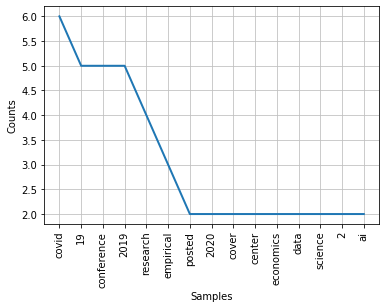

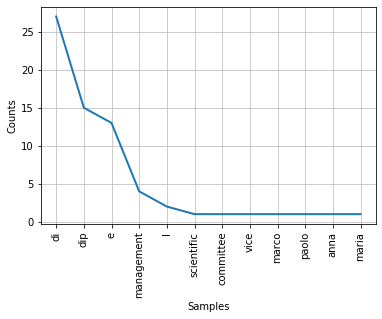

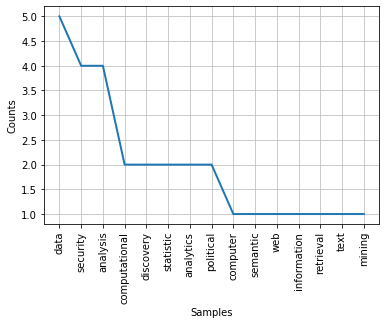

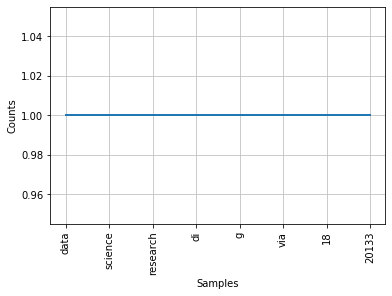

In [12]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [13]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,Data Science Research Center (DSRC) – Universi...,"{'data': 5, 'science': 4, 'research': 4, 'cent..."
1,Blog – Data Science Research Center (DSRC),"{'posted': 2, '25': 1, '202025': 1, '2020cover..."
2,Scientific Committee and members – Data Scienc...,"{'scientific': 1, 'committee': 1, 'di': 27, 'v..."
3,Skills & Expertise – Data Science Research Cen...,"{'computer': 1, 'semantic': 1, 'web': 1, 'info..."
4,Contacts – Data Science Research Center (DSRC),"{'data': 1, 'science': 1, 'research': 1, 'di':..."


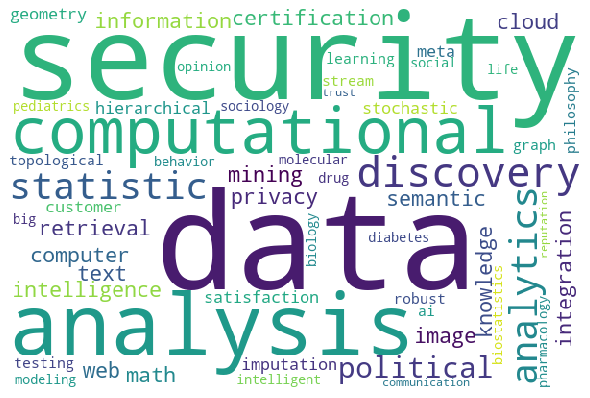

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale
Frequenza (F) <br>
* Più volte due parole x e y co-occorrono più il loro grado di associazione è alto
* Prende in considerazione il comportamento delle parole nel testo
* Problema: parole molto frequenti hanno grado di associazione più alto rispetto a parole poco frequenti !!

F= #occorrenze della co-occorrenza xy in un corpus / # occorrenze totale di tutte le parole di un corpus


In [15]:
tot_text = ''.join(map(str, clean_texts))
tot_text = ''.join(i for i in tot_text if not i.isdigit())
type(tot_text)

str

tolgo parole che ho notato essere frequenti

In [16]:
removal_list = ["di", 'e', 'degli', 'dip', 'antoni', 'giovanni', 'dipartimento', 'diniche']
edit_string_as_list = tot_text.split()
final_list = [word for word in edit_string_as_list if word not in removal_list]
final_string = ' '.join(final_list)

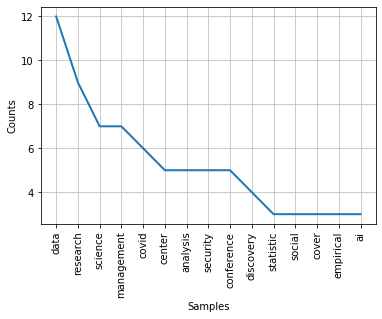

In [17]:
tokens=word_tokenize(final_string)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [18]:
textfile = open('UniMi.txt', 'w')
textfile.write(final_string)
textfile.close()

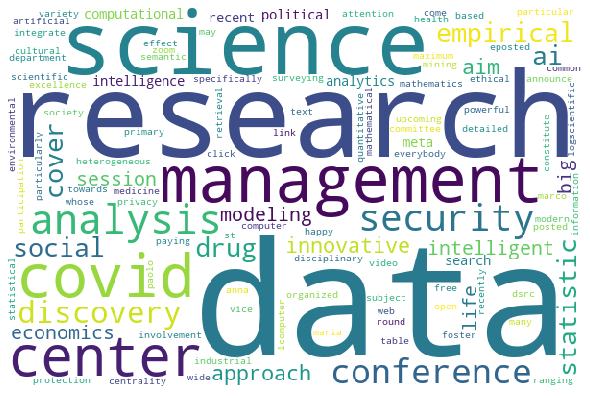

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(final_string) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()